In [1]:
import os
import getpass
if getpass.getuser() == 'vscode':       # Running in container
    os.chdir('/workspaces/kornia/')
else:                                   # Running in virtual environment
    os.chdir(os.path.join(os.path.expanduser('~'), 'Documents/Git/kornia/'))
print(os.getcwd())

/home/yhollander/Documents/Git/kornia


## Parsing camera poses

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from kornia.geometry.nerf.camera_utils import CameraParser
from kornia.geometry.nerf.rays import UniformRaySampler

from kornia.geometry.nerf.kornia_nerf_jupyter.extrinsic2pyramid.util.camera_pose_visualizer import CameraPoseVisualizer

In [3]:
camera_parser = CameraParser('./test/geometry/nerf/cameras.xml', device='cpu')
cameras = camera_parser.create_cameras()

initialize camera pose visualizer


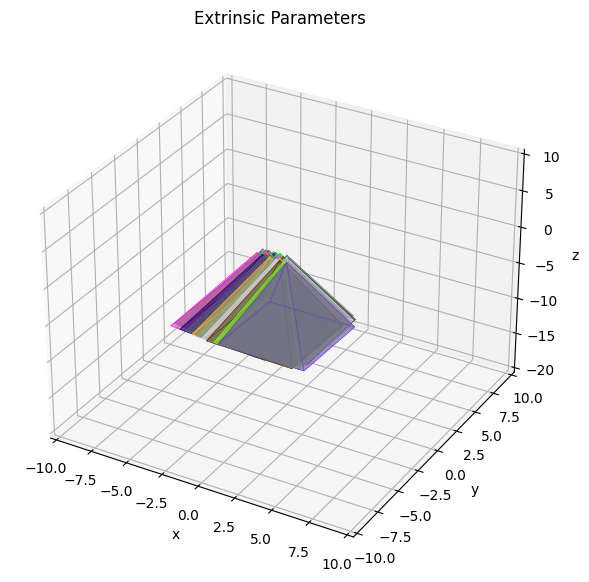

In [4]:
visualizer = CameraPoseVisualizer([-10, 10], [-10, 10], [-20, 10])
for i in range(cameras.batch_size):
    R = cameras.extrinsics[i].numpy()
    c = np.random.rand(3)
    visualizer.extrinsic2pyramid(R, c, 10)
visualizer.show()

## Spiral pattern based on parsed cameras

In [5]:
from kornia.geometry.nerf.camera_utils import create_spiral_path

cameras_spiral = create_spiral_path(cameras, rad=1., num_views=20, num_circles=2)

initialize camera pose visualizer


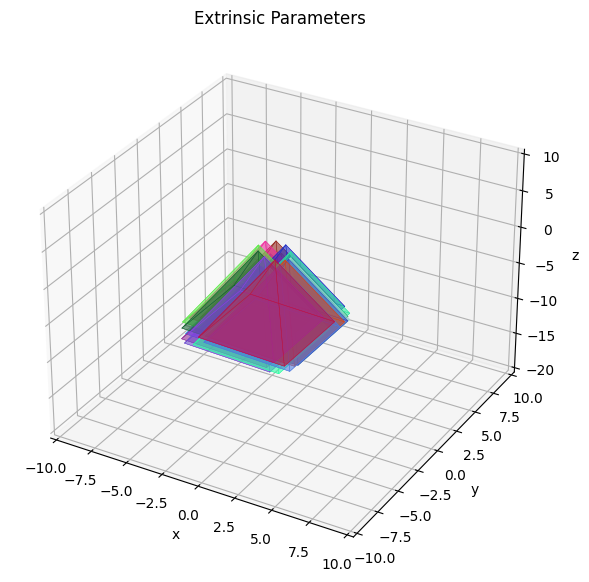

In [8]:
visualizer = CameraPoseVisualizer([-10, 10], [-10, 10], [-20, 10])
for i in range(cameras_spiral.batch_size):
    R = cameras_spiral.extrinsics[i].numpy()
    c = np.random.rand(3)
    visualizer.extrinsic2pyramid(R, c, 10)
visualizer.show()

In [6]:
uniform_sampler_cameras = UniformRaySampler(2, 20)
points_2d_cameras = uniform_sampler_cameras.sample_points_2d(cameras.height, cameras.width, sampling_step=80)[762048]
print(points_2d_cameras)
points_3d_cameras = cameras.unproject(points_2d_cameras.points_2d, 1)

Text(0.5, 0, 'z')

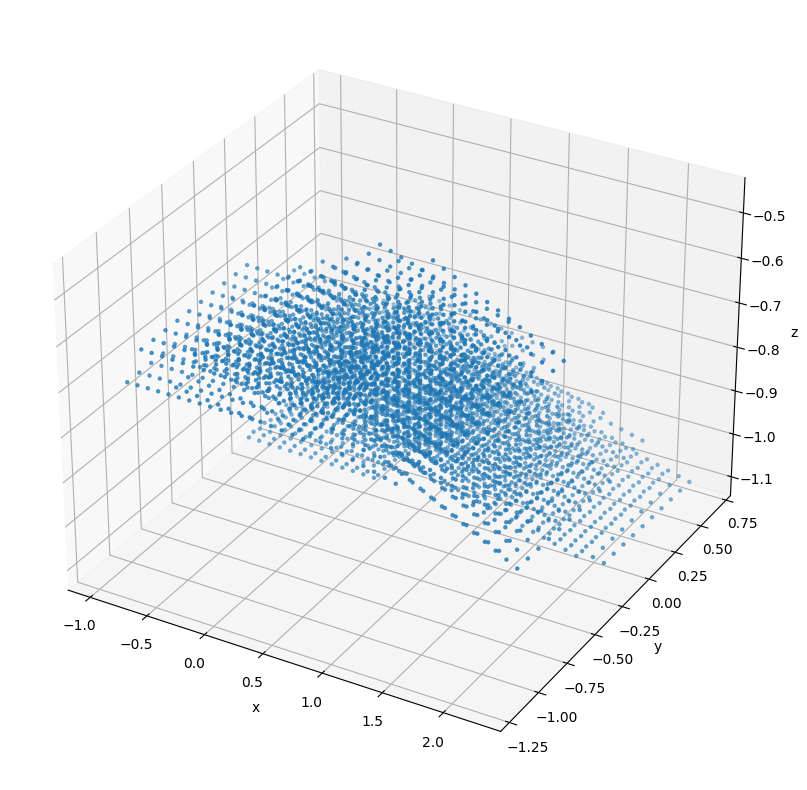

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(points_3d_cameras[..., 0], points_3d_cameras[..., 1], points_3d_cameras[..., 2], marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')